In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt

data = pd.read_csv("todd.csv") #Reading the dataset in a dataframe using Pandas

data.head(10)

,Wort,lebt,in_Hand,transparent,selbst_machen,erreichbar,beweglich,doppel_form,Holz,mehrere,...,Q,R,S,T,U,V,W,X,Y,Z
0,Book,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Candle,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Fruit,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1
3,Flowers,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,-1
4,Flute,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,-1,-1
5,Sandtimer,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,1,-1,-1,-1,-1,-1,-1
6,Skull,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,-1
7,Jug,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
8,Dice,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,Shell,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1


In [27]:
#Import models from scikit learn module:
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics


model = tree.DecisionTreeClassifier(criterion='entropy')
outcome = ['Wort']
predictors = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','Y',]
classes = list(data['Wort'])
features = predictors

#Fit the model:
model.fit(data[predictors],data[outcome])
  
#Make predictions on training set:
predictions = model.predict(data[predictors])
  
#Print accuracy
accuracy = metrics.accuracy_score(predictions,data[outcome])
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

#Perform k-fold cross-validation with 5 folds
kf = KFold(data.shape[0], n_folds=5)
error = []
for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
model.fit(data[predictors],data[outcome]) 

Accuracy : 100.000%
Cross-Validation Score : 0.000%


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

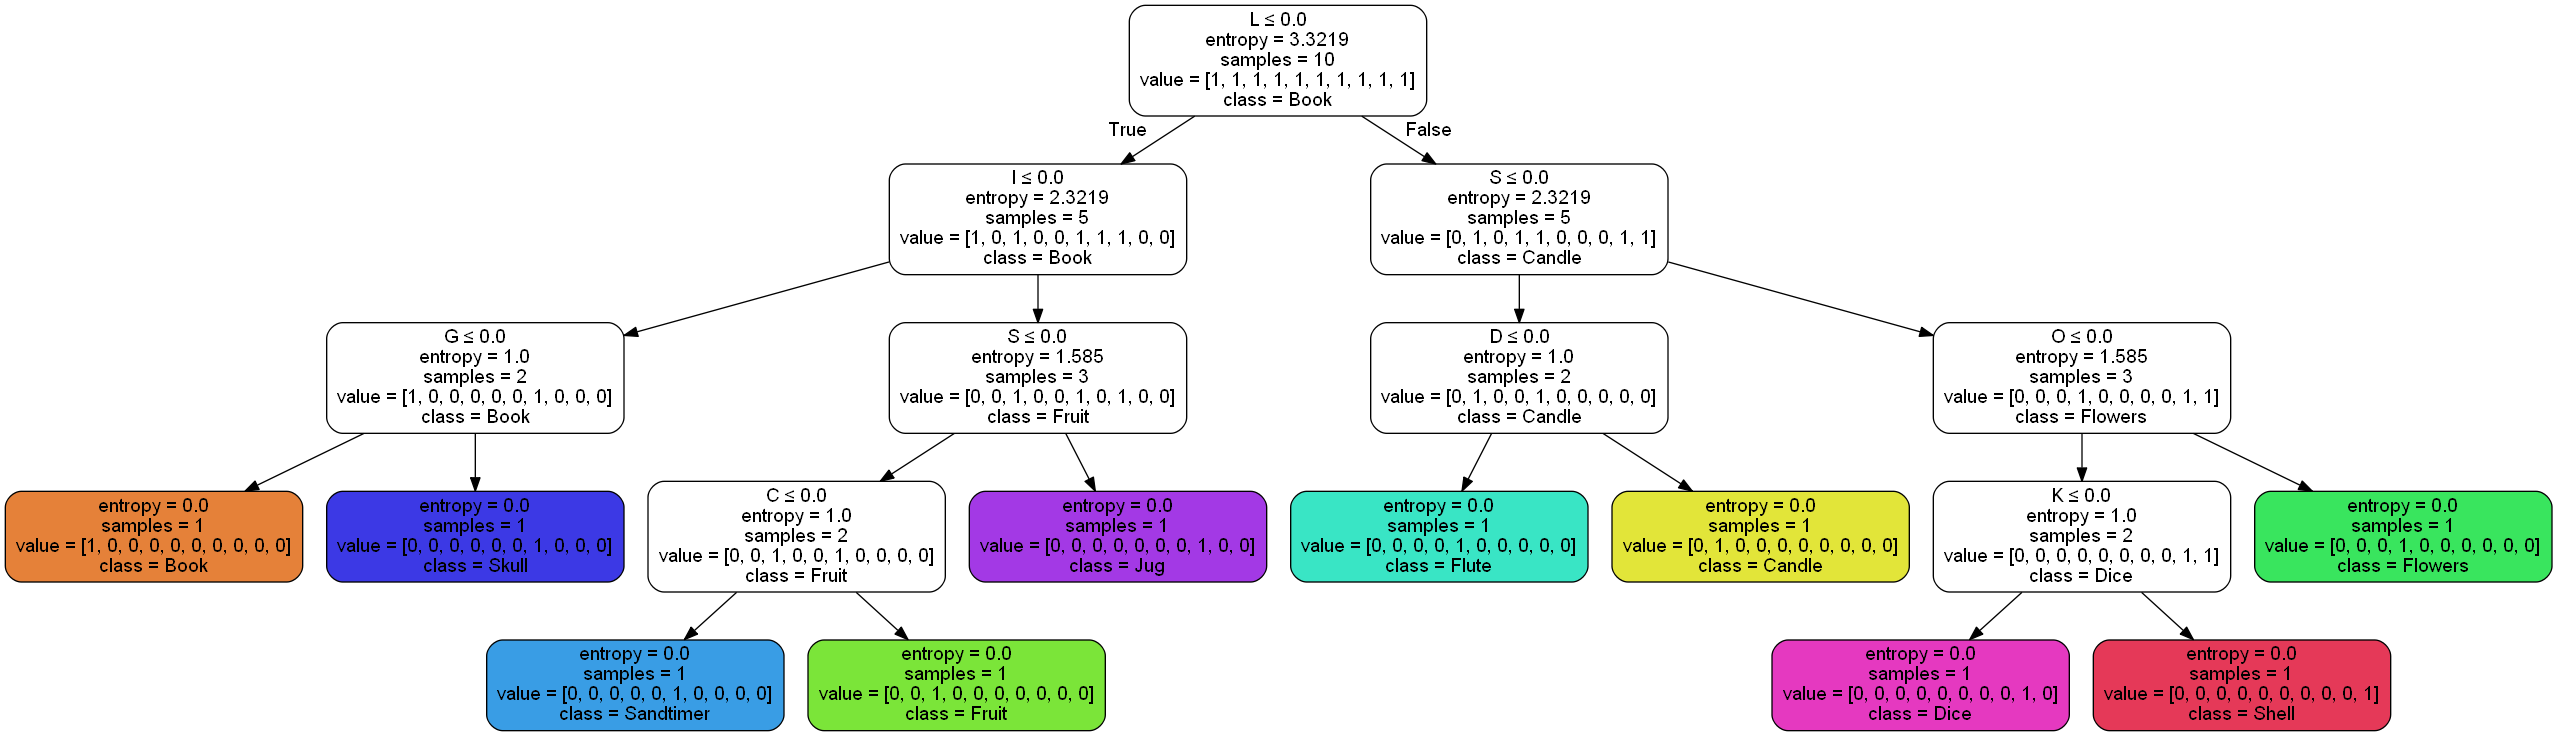

In [28]:
with open("D:\decisiontree/proteus_classifier.txt", "w") as f:
     f = tree.export_graphviz(model, out_file=f, class_names=classes, feature_names=features)
import pydotplus
import graphviz

from IPython.display import Image  
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=features,  
                         class_names=classes,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 